# **Polynomial Regression & Regularization**
2023-01-13

linear 한 관계란, 데이터를 가장 잘 설명해주는 **직선**을 찾는 것이다. 하지만 데이터가 x,y 좌표에서 직선의 형태가 아닌 형태로 되어있다면 linear 말고 다른 방법을 찾아야 한다. 

## 1.1 A special case of multiple linear regression

4차 방정식(polynomial function) $y = x^4 + x^3 - 4x^2$ 에 대한 데이터를 생성

\+ **noise**

In [1]:
from matplotlib import pyplot
from autograd import grad
from autograd import numpy

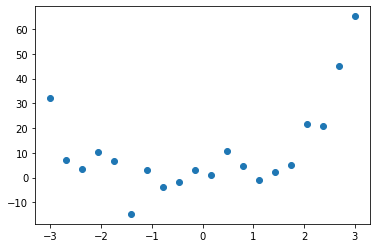

In [2]:
numpy.random.seed(0)    # fix seed for reproducibility
x = numpy.linspace(-3, 3, 20)
y = x**4 + x**3 - 4*x**2 + 8*numpy.random.normal(size=len(x))
pyplot.scatter(x, y);

생성한 데이터는 곡선의 형태이기 때문에 직선으로 표현하는데에는 무리가 있다. 

$$\hat{y} = w_0 + w_1x + w_2x^2 + ... + w_dx^d$$

$w$는 찾아야 할 계수들이다. 주어진 $x, y$를 가장 잘 설명해줄 수 있는 $w$를 찾는 것이 목적이다. 

$x_i = x^i$라고 정의를 하면 다음과 같이 나타낼 수 있다. 

$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_dx_d$$

polynomial regression 문제가 multiple linear regression 문제와 동일하다. 이 또한 이전에 한 것처럼 행렬의 형태로 나타낼 수 있다. 

$$\hat{\mathbf{y}} = \begin{bmatrix}
\hat{y}^{(1)}  \\
\hat{y}^{(2)}\\
\vdots  \\
\hat{y}^{(N)}
\end{bmatrix} =
\begin{bmatrix}
x_0^{(1)} &  x_1^{(1)} & \cdots & x_d^{(1)} \\
x_0^{(2)} &  x_1^{(2)} & \cdots & x_d^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
x_0^{(N)} &  x_1^{(N)} & \cdots & x_d^{(N)}
\end{bmatrix} \begin{bmatrix}
w_0  \\
w_1\\
\vdots  \\
w_d 
\end{bmatrix} 
= \mathbf{X}\mathbf{w}$$

In [3]:
degree = 3

def polynomial_features(x, degree):
    """ Generate polynomial features for x."""
    
    X = numpy.empty((len(x), degree+1))
    for i in range(degree+1):
        X[:,i] = x**i
    return X

X = polynomial_features(x, degree)
print(X.shape)

(20, 4)


## 1.2 Scale the data, train the model

입력 변수들을 정규화 : min max sclaer

In [4]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled[:,0] = 1   # the column for intercept

In [5]:
def linear_regression(params, X):
    '''
    The linear regression model in matrix form.
    Arguments:
      params: 1D array of weights for the linear model
      X     : 2D array of input values
    Returns:
      1D array of predicted values
    '''
    return numpy.dot(X, params)

def mse_loss(params, model, X, y):
    '''
    The mean squared error loss function.
    Arguments:
      params: 1D array of weights for the linear model
      model : function for the linear regression model
      X     : 2D array of input values
      y     : 1D array of predicted values
    Returns:
      float, mean squared error
    '''
    y_pred = model(params, X)
    return numpy.mean( numpy.sum((y-y_pred)**2) )

gradient = grad(mse_loss)

In [6]:
max_iter = 3000
alpha = 0.01
params = numpy.zeros(X_scaled.shape[1])
descent = numpy.ones(X_scaled.shape[1])
i = 0

from sklearn.metrics import mean_absolute_error

while numpy.linalg.norm(descent) > 0.01 and i < max_iter:
    descent = gradient(params, linear_regression, X_scaled, y)
    params = params - descent * alpha
    loss = mse_loss(params, linear_regression, X_scaled, y)
    mae = mean_absolute_error(y, X_scaled@params)
    if i%100 == 0:
        print("iteration {}, loss = {}, mae = {}".format(i, loss, mae))
    i += 1

iteration 0, loss = 5434.767518111348, mae = 11.05718775676392
iteration 100, loss = 1300.4768479787672, mae = 6.885099348931476
iteration 200, loss = 1281.308959359777, mae = 6.8639053389713665
iteration 300, loss = 1272.9896965024661, mae = 6.807943451695349
iteration 400, loss = 1267.4477500708404, mae = 6.760476747247461
iteration 500, loss = 1263.7497451381248, mae = 6.721622404779564
iteration 600, loss = 1261.282144135704, mae = 6.689879731162117
iteration 700, loss = 1259.6355657998567, mae = 6.663949878547802
iteration 800, loss = 1258.5368386500606, mae = 6.642768513961068
iteration 900, loss = 1257.8036810933152, mae = 6.625466061127554
iteration 1000, loss = 1257.314460450035, mae = 6.611332180986304
iteration 1100, loss = 1256.9880137870919, mae = 6.5997866175015245
iteration 1200, loss = 1256.7701827834117, mae = 6.5903553760560865
iteration 1300, loss = 1256.6248287285202, mae = 6.582651263968432
iteration 1400, loss = 1256.5278370197357, mae = 6.576357994582585
iteratio

### Trained parameter

In [7]:
params

array([-22.51572398,   6.75930601,  41.30788709,  30.0105898 ])

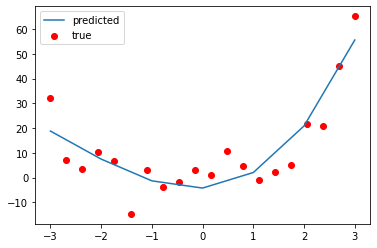

In [9]:
xgrid = numpy.linspace(x.min(), x.max(), 7)
Xgrid_poly_feat = polynomial_features(xgrid, degree)
Xgrid_scaled = min_max_scaler.transform(Xgrid_poly_feat)
Xgrid_scaled[:,0] = 1 
pyplot.scatter(x, y, c='r', label='true')
pyplot.plot(xgrid, Xgrid_scaled@params, label='predicted')
pyplot.legend();

## 1.3 Observe underfitting & overfitting

1부터 15까지 다양한 차수를 통한 학습 과정에서 변화를 관찰

In [10]:
from urllib.request import urlretrieve
URL = 'https://raw.githubusercontent.com/engineersCode/EngComp6_deeplearning/master/scripts/plot_helpers.py'
urlretrieve(URL, 'plot_helpers.py')

('plot_helpers.py', <http.client.HTTPMessage at 0x7fb95aab4bb0>)

In [11]:
from plot_helpers import interact_polyreg

max_degree = 15
interact_polyreg(max_degree, x, y)

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Output()), _dom_classes=('widge…

### 1.3.1 Underfitting

위 셀에서 degree를 1로 설정을 하면 우리의 데이터와 가장 잘 맞는 직선을 찾아주지만 직선은 너무 간단해서 데이터가 흩뿌려져 있을 때는 그 데이터를 잘 설명하지 못한다. 

### 1.3.2 Overfitting

degree를 높게 설정하면 Training error인 MAE 값이 점점 감소하면서 모델이 곡선을 이루면서 모든 training point를 지나게 된다. 하지만 새로운 데이터가 들어오게 된다면 Training data를 모두 커버하려고 매우 복잡하기 때문에 새로운 데이터를 잘 못 맞추게 된다. 예를 들어 위에서 degree 15 일 때 맨 오른 쪽 두 점 가운데로 새로운 데이터가 들어온다면, 기존의 데이터들과 매우 비슷한 데이터이지만 모델은 매우 큰 값을 예측하게 되어 큰 오류 값을 가지게 된다. 


## 1.4 Regularization

Regularization은 overfitting 을 막는 방법이다. Cost function에서 새로운 식을 추가해서 복잡한 모델이 되는 것을 막아준다.
$$\hat{y} = w_0 + w_1x + w_2x^2 + ... + w_dx^d$$

차수를 가진 항들이 모델을 복잡하게 만들어서 계수값에 제한 조건을 추가한다. 

보편적인 방법은 regularization term 인 $\lambda\sum_{j=1}^dw_j^2$를 추가하는 것이다. Mean-squared error를 사용한 cost function에 추가하면 다음과 같다. 

$$L(\mathbf{w}) = \frac{1}{N} \lVert \mathbf{y} - \mathbf{Xw} \rVert^2 + \lambda \sum_{j=1}^d w_j^2$$

새롭게 만든 cost function은 계수들이 작은 값이 되는 것을 선호하게 되는데 계수들이 커지게 되면 두번째 항이 커지게 돼서 cost 값이 늘어나게 되기 때문이다. 

위 식에서 $\lambda$는 regularization parameter로 얼마나 큰 제약을 줄 것인가를 결정하게 된다. $\lambda$가 큰 값을 가질수록 계수들을 더 작게 할 수 있다. 


In [12]:
def regularized_loss(params, model, X, y, _lambda=1.0):
    '''
    The mean squared error loss function with an L2 penalty.
    Arguments:
      params: 1D array of weights for the linear model
      model : function for the linear regression model
      X     : 2D array of input values
      y     : 1D array of predicted values
      _lambda: regularization parameter, default 1.0
    Returns:
      float, regularized mean squared error
    '''
    y_pred = model(params, X)
    return numpy.mean( numpy.sum((y-y_pred)**2) ) + _lambda * numpy.sum( params[1:]**2 )

gradient = grad(regularized_loss)     

In [13]:
no_regularization_params = params.copy()

In [14]:
max_iter = 3000
alpha = 0.01
params = numpy.zeros(X_scaled.shape[1])
descent = numpy.ones(X_scaled.shape[1])
i = 0

from sklearn.metrics import mean_absolute_error

while numpy.linalg.norm(descent) > 0.01 and i < max_iter:
    descent = gradient(params, linear_regression, X_scaled, y)
    params = params - descent * alpha
    loss = mse_loss(params, linear_regression, X_scaled, y)
    mae = mean_absolute_error(y, X_scaled@params)
    if i%100 == 0:
        print("iteration {}, loss = {}, mae = {}".format(i, loss, mae))
    i += 1

iteration 0, loss = 5434.767518111348, mae = 11.05718775676392
iteration 100, loss = 1785.9852202374184, mae = 6.983886996350374
iteration 200, loss = 1764.2597057711018, mae = 6.966518785947395
iteration 300, loss = 1763.5702631188328, mae = 6.965728405272657


In [15]:
zeros = numpy.array([[1, 0, 0, 0]])

In [16]:
params.shape

(4,)

**original data** vs **normalized data**

weights without regularization
[-22.51572398   6.75930601  41.30788709  30.0105898 ]
weights with regularization
[-11.13750882  12.48522096  28.26626633  11.09211867]


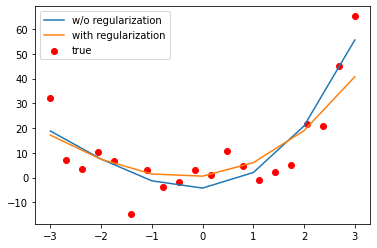

In [17]:
print("weights without regularization")
print(no_regularization_params)
print("weights with regularization")
print(params)

pyplot.scatter(x, y, c='r', label='true')
pyplot.plot(xgrid, Xgrid_scaled@no_regularization_params, label='w/o regularization')
pyplot.plot(xgrid, Xgrid_scaled@params, label='with regularization')
pyplot.legend();

In [18]:
interact_polyreg(max_degree, x, y, regularized=True)

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Output()), _dom_classes=('widge…

Degree가 커질수록 regularization의 중요성이 부각된다. 높은 차수에서 예측 모델이 부드럽게 학습 데이터들을 지나가는 모습을 볼 수 있다. Normalization을 통해 새롭게 들어오는 데이터도 잘 예측할 수 있다. 